In [35]:
from gensim.test.utils import common_texts, get_tmpfile # get_tmpfile: save a model for us
from gensim.models import Word2Vec
from nltk import word_tokenize
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [36]:
data = pd.read_csv("occ_cleaned.csv")
data.head()

,product_id,attribute_name,attribute_value,brand,description,details,name
0,01DVS1SHB0MXNERKX17C3P5YXS,occasion,weekend,mansurgavriel,Mansur Gavriel's sleek mini top handle bag was...,Zip fastening across top Composition: calf lea...,Mini Leather Top Handle Bag
1,01DVS1SHB0MXNERKX17C3P5YXS,occasion,weekend,mansurgavriel,Mansur Gavriel's sleek mini top handle bag was...,Zip fastening across top Composition: calf lea...,Mini Leather Top Handle Bag
2,01DPEEZGRJYX4N4WE78GPM0B2G,occasion,weekend,jcrew,Meet your new favorite everyday ankle boot&mda...,UNKNOWN_TOKEN,Sadie boots in suede
3,01DTJ8EMCR26JCYAWK0CYST9H7,occasion,daytonight,marni,It’s everything you want in a structured every...,UNKNOWN_TOKEN,Law Bag Shoulder Bag
4,01E1JKZ7CJ8A3C1PPM0QCAEDGY,occasion,work,veronicabeard,Made from the highest quality Japanese stretch...,"High rise. True to size. SIZEVALUE, SIZEVALUE...",Kate 10 Skinny Jeans


In [37]:
data.describe()

,product_id,attribute_name,attribute_value,brand,description,details,name
count,12988,12988,12988,12988,12988,12988,12988
unique,3914,1,7,308,3518,2574,3396
top,01DS48V97WA6D0APP3S4ABZN2P,occasion,weekend,frame,UNKNOWN_TOKEN,UNKNOWN_TOKEN,Hunter
freq,20,12988,4275,1151,1166,1152,156


In [38]:
data.attribute_value.unique()

array(['weekend', 'daytonight', 'work', 'vacation', 'nightout', 'workout',
       'coldweather'], dtype=object)

In [39]:
all_value = data.groupby('product_id')['attribute_value'].unique().reset_index()

In [41]:
all_value.head()

,product_id,attribute_value
0,01DPC9GSTT72KHNN0MNDNKH7RD,"[daytonight, work]"
1,01DPCB2KEAVXXKFVM7FXBNE4VY,"[daytonight, weekend, work]"
2,01DPCG1C1P0MQAV9NMS3N1TDAA,"[weekend, nightout]"
3,01DPCHNEW5F2RHJQ3NJMVPK6SE,"[work, daytonight, weekend]"
4,01DPCHNQM0PA0SXZZZX85PF2ZJ,"[daytonight, weekend]"


In [40]:
all_value.shape

(3914, 2)

## label=1

In [45]:
wkd = all_value[all_value['attribute_value'].apply(lambda x: 'weekend' in x)]
wkd = pd.merge(wkd, data, how='left', on='product_id')
wkd = wkd.iloc[:,3:]
wkd.columns = ['label','brand','description','details','name']
wkd = wkd[wkd.label=='weekend']
wkd.drop_duplicates(inplace=True)

In [46]:
dtn = all_value[all_value['attribute_value'].apply(lambda x: 'daytonight' in x)]
dtn = pd.merge(dtn, data, how='left', on='product_id')
dtn = dtn.iloc[:,3:]
dtn.columns = ['label','brand','description','details','name']
dtn = dtn[dtn.label=='daytonight']
dtn.drop_duplicates(inplace=True)

In [47]:
work = all_value[all_value['attribute_value'].apply(lambda x: 'work' in x)]
work = pd.merge(work, data, how='left', on='product_id')
work = work.iloc[:,3:]
work.columns = ['label','brand','description','details','name']
work = work[work.label=='work']
work.drop_duplicates(inplace=True)

In [48]:
ntot = all_value[all_value['attribute_value'].apply(lambda x: 'nightout' in x)]
ntot = pd.merge(ntot, data, how='left', on='product_id')
ntot = ntot.iloc[:,3:]
ntot.columns = ['label','brand','description','details','name']
ntot = ntot[ntot.label=='nightout']
ntot.drop_duplicates(inplace=True)

In [49]:
vc = all_value[all_value['attribute_value'].apply(lambda x: 'vacation' in x)]
vc = pd.merge(vc, data, how='left', on='product_id')
vc = vc.iloc[:,3:]
vc.columns = ['label','brand','description','details','name']
vc = vc[vc.label=='vacation']
vc.drop_duplicates(inplace=True)

In [50]:
wkot = all_value[all_value['attribute_value'].apply(lambda x: 'workout' in x)]
wkot = pd.merge(wkot, data, how='left', on='product_id')
wkot = wkot.iloc[:,3:]
wkot.columns = ['label','brand','description','details','name']
wkot = wkot[wkot.label=='workout']
wkot.drop_duplicates(inplace=True)

In [51]:
cw = all_value[all_value['attribute_value'].apply(lambda x: 'coldweather' in x)]
cw = pd.merge(cw, data, how='left', on='product_id')
cw = cw.iloc[:,3:]
cw.columns = ['label','brand','description','details','name']
cw = cw[cw.label=='coldweather']
cw.drop_duplicates(inplace=True)

## label = 0

In [52]:
nwkd = all_value[all_value['attribute_value'].apply(lambda x: 'weekend' not in x)]
nwkd = pd.merge(nwkd, data, how='left', on='product_id')
nwkd = nwkd.iloc[:,3:]
nwkd.columns = ['label','brand','description','details','name']
nwkd['label'] = 0
nwkd.drop_duplicates(inplace=True)

In [53]:
ndtn = all_value[all_value['attribute_value'].apply(lambda x: 'daytonight' not in x)]
ndtn = pd.merge(ndtn, data, how='left', on='product_id')
ndtn = ndtn.iloc[:,3:]
ndtn.columns = ['label','brand','description','details','name']
ndtn['label'] = 0
ndtn.drop_duplicates(inplace=True)

In [54]:
nvc = all_value[all_value['attribute_value'].apply(lambda x: 'vacation' not in x)]
nvc = pd.merge(nvc, data, how='left', on='product_id')
nvc = nvc.iloc[:,3:]
nvc.columns = ['label','brand','description','details','name']
nvc['label'] = 0
nvc.drop_duplicates(inplace=True)

In [55]:
nwkot = all_value[all_value['attribute_value'].apply(lambda x: 'workout' not in x)]
nwkot = pd.merge(nwkot, data, how='left', on='product_id')
nwkot = nwkot.iloc[:,3:]
nwkot.columns = ['label','brand','description','details','name']
nwkot['label'] = 0
nwkot.drop_duplicates(inplace=True)

In [56]:
ncw = all_value[all_value['attribute_value'].apply(lambda x: 'coldweather' not in x)]
ncw = pd.merge(ncw, data, how='left', on='product_id')
ncw = ncw.iloc[:,3:]
ncw.columns = ['label','brand','description','details','name']
ncw['label'] = 0
ncw.drop_duplicates(inplace=True)

In [57]:
ncw

,label,brand,description,details,name
0,0,jcrew,"Your new wear-to-work essential, this roomy to...",UNKNOWN_TOKEN,Devon bonded leather tote
2,0,jcrew,A classic fall silhouette in a classic fall-fr...,UNKNOWN_TOKEN,Fiona lace-up kitten heel ankle boots in black...
7,0,jcrew,Luxe doesn't even begin to describe this perfe...,UNKNOWN_TOKEN,Collection fluted sheath dress in Ratti® climb...
11,0,jcrew,"When it comes to quality and color, no one doe...",UNKNOWN_TOKEN,Long-sleeve everyday cashmere mockneck sweater
17,0,jcrew,Our slim boyfriend jeans are tailored perfectl...,UNKNOWN_TOKEN,Slim boyfriend jean in hydrangea blue wash
...,...,...,...,...,...
12088,0,samedelman,"A woven espadrille sole extends the chic, summ...",Runs large; order 1/2 size down.Textile or lea...,Krissy Espadrille Flat
12091,0,alo,Pintucked panels create a cool moto aesthetic ...,"SIZE_VALUE, SIZE_VALUE, SIZE_VALUE, SIZE_VALUE...",High Waist Moto 7/8 Leggings
12092,0,thegreat,"Puff sleeves, covered rouleau buttons and an o...","True to size.47"" length (size 1/4-6)Front butt...",The Ravine Cotton Midi Dress
12095,0,citizensofhumanity,"Slim from the knee to the hems, these wear-wit...",If between sizes; order one size up. SIZEVALUE...,Elsa Slim Jeans


## Sample data

### wkd

In [58]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import spacy
import en_core_web_md
from sklearn.model_selection import train_test_split

In [59]:
num_1 = len(wkd['description'])
num_0 = len(nwkd['description'])
docs = wkd['description'].tolist() + nwkd['description'].tolist()
labels = np.concatenate([np.ones(num_1), np.zeros(num_0)])

In [60]:
nlp = en_core_web_md.load()
stopwords_removed_docs = list(
    map(lambda doc: " ".join([token.text for token in nlp(doc) if not token.is_stop]), docs))

In [61]:
tokenizer = Tokenizer(num_words=5000, oov_token="UNKNOWN_TOKEN")
tokenizer.fit_on_texts(stopwords_removed_docs)

In [62]:
def integer_encode_documents(docs, tokenizer):
    return tokenizer.texts_to_sequences(docs)

# integer encode the documents
encoded_docs = integer_encode_documents(stopwords_removed_docs, tokenizer)
# this is a list of lists, the numbers represent the index position of that word.
MAX_SEQUENCE_LENGTH = len(max(stopwords_removed_docs,key=len))
padded_docs = pad_sequences(encoded_docs, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [63]:
encoder = LabelEncoder()
labels = to_categorical(encoder.fit_transform(labels))

In [64]:
X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.2)

In [65]:
X_train.shape

(3189, 862)

## Glove

In [66]:
from random import randint
from numpy import array, argmax, asarray, zeros
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras import optimizers

In [67]:
def load_glove_vectors():
    embeddings_index = {}
    with open('glove.6B.100d.txt') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print('Loaded %s word vectors.' % len(embeddings_index))
    return embeddings_index


embeddings_index = load_glove_vectors()

Loaded 400000 word vectors.


In [71]:
VOCAB_SIZE = int(len(tokenizer.word_index) * 1.1)
MAX_SEQUENCE_LENGTH = len(max(stopwords_removed_docs,key=len))

In [72]:
MAX_SEQUENCE_LENGTH

862

In [69]:
embedding_matrix = zeros((VOCAB_SIZE, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: # check that it is an actual word that we have embeddings for
        embedding_matrix[i] = embedding_vector

In [70]:
embedding_matrix.shape

(6372, 100)

In [30]:
from keras.layers.recurrent import SimpleRNN, LSTM
from keras.layers import Flatten, Masking
# define model

def make_binary_classification_rnn_model(plot=False):
    model = Sequential()
    # embedding(input_dim, output_dim)
    model.add(Embedding(VOCAB_SIZE, 100, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
    model.add(Masking(mask_value=0.0)) # masking layer, masks any words that don't have an embedding as 0s.
    model.add(SimpleRNN(units=32, input_shape=(1, MAX_SEQUENCE_LENGTH))) # set hidden state dimensionality to 64
    model.add(Dense(16))
    model.add(Dense(2, activation='softmax')) # 2 nodes, prediction for positive/negative, two classes
    
    # Compile the model
    model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # summarize the model
    model.summary()
    
    if plot:
        plot_model(model, to_file='model.png', show_shapes=True)
    return model

def make_lstm_classification_model(plot=False):
    model = Sequential()
    model.add(Embedding(VOCAB_SIZE, 100, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
    model.add(Masking(mask_value=0.0)) # masking layer, masks any words that don't have an embedding as 0s.
    model.add(LSTM(units=32, input_shape=(1, MAX_SEQUENCE_LENGTH)))
    model.add(Dense(16))
    model.add(Dense(2, activation='softmax'))
    
    opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    # Compile the model
    model.compile(
    optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    # summarize the model
    model.summary()
    
    if plot:
        plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [31]:
MAX_SEQUENCE_LENGTH = len(max(stopwords_removed_docs,key=len))
model = make_lstm_classification_model()
#model = make_binary_classification_rnn_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 862, 100)          637200    
_________________________________________________________________
masking_1 (Masking)          (None, 862, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 654,786
Trainable params: 17,586
Non-trainable params: 637,200
_________________________________________________________________


In [32]:
history = model.fit(X_train, y_train,validation_split = 0.1, epochs=25, verbose=1)

Train on 2870 samples, validate on 319 samples
Epoch 1/25
2870/2870 [==============================] - 83s 29ms/step - loss: 0.5644 - accuracy: 0.7481 - val_loss: 0.5409 - val_accuracy: 0.7618
Epoch 2/25
2870/2870 [==============================] - 96s 34ms/step - loss: 0.5325 - accuracy: 0.7617 - val_loss: 0.5318 - val_accuracy: 0.7618
Epoch 3/25
2870/2870 [==============================] - 78s 27ms/step - loss: 0.5073 - accuracy: 0.7693 - val_loss: 0.5124 - val_accuracy: 0.7555
Epoch 4/25
2870/2870 [==============================] - 70s 24ms/step - loss: 0.4719 - accuracy: 0.7871 - val_loss: 0.5031 - val_accuracy: 0.7429
Epoch 5/25
2870/2870 [==============================] - 67s 23ms/step - loss: 0.4530 - accuracy: 0.7899 - val_loss: 0.4959 - val_accuracy: 0.7618
Epoch 6/25
2870/2870 [==============================] - 82s 29ms/step - loss: 0.4231 - accuracy: 0.8059 - val_loss: 0.4900 - val_accuracy: 0.7680
Epoch 7/25
2870/2870 [==============================] - 76s 27ms/step - loss:

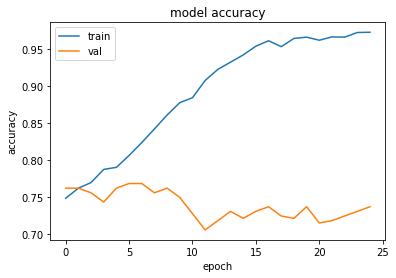

In [33]:
import keras
from matplotlib import pyplot as plt

def plot_fit_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
plot_fit_history(history)

In [34]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

798/798 [==============================] - 4s 5ms/step
Accuracy: 75.939852


## Train own embedding

In [156]:
num_1 = len(wkd['description'])
num_0 = len(nwkd['description'])
docs = wkd['description'].tolist() + nwkd['description'].tolist()
labels = np.concatenate([np.ones(num_1), np.zeros(num_0)])

In [157]:
nlp = en_core_web_md.load()
stopwords_removed_docs = list(
    map(lambda doc: " ".join([token.text for token in nlp(doc) if not token.is_stop]), docs))

In [158]:
def integer_encode_documents(docs, tokenizer):
    return tokenizer.texts_to_sequences(docs)


vocab_size = 5000
MAX_SEQUENCE_LENGTH = len(max(stopwords_removed_docs,key=len))
EMBEDDING_SIZE = 100


tokenizer = Tokenizer()
tokenizer.fit_on_texts(stopwords_removed_docs)
encoded_docs = integer_encode_documents(stopwords_removed_docs, tokenizer)
padded_docs = pad_sequences(encoded_docs, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

encoder = LabelEncoder()
labels = to_categorical(encoder.fit_transform(labels))
X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.2)

In [159]:
model = make_lstm_classification_model()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 862, 100)          40000000  
_________________________________________________________________
masking_14 (Masking)         (None, 862, 100)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 32)                17024     
_________________________________________________________________
dense_27 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 34        
Total params: 40,017,586
Trainable params: 17,586
Non-trainable params: 40,000,000
_________________________________________________________________


In [160]:
history = model.fit(X_train, y_train,validation_split = 0.1, epochs=25, verbose=1)

Train on 2870 samples, validate on 319 samples
Epoch 1/25
2870/2870 [==============================] - 69s 24ms/step - loss: 0.5740 - accuracy: 0.7314 - val_loss: 0.5516 - val_accuracy: 0.7586
Epoch 2/25
2870/2870 [==============================] - 63s 22ms/step - loss: 0.5368 - accuracy: 0.7624 - val_loss: 0.5519 - val_accuracy: 0.7586
Epoch 3/25
2870/2870 [==============================] - 63s 22ms/step - loss: 0.5224 - accuracy: 0.7627 - val_loss: 0.5521 - val_accuracy: 0.7586
Epoch 4/25
2870/2870 [==============================] - 66s 23ms/step - loss: 0.5059 - accuracy: 0.7655 - val_loss: 0.5649 - val_accuracy: 0.7586
Epoch 5/25
2870/2870 [==============================] - 67s 23ms/step - loss: 0.4860 - accuracy: 0.7791 - val_loss: 0.5590 - val_accuracy: 0.7680
Epoch 6/25
2870/2870 [==============================] - 66s 23ms/step - loss: 0.4541 - accuracy: 0.7941 - val_loss: 0.5754 - val_accuracy: 0.7618
Epoch 7/25
2870/2870 [==============================] - 68s 24ms/step - loss:

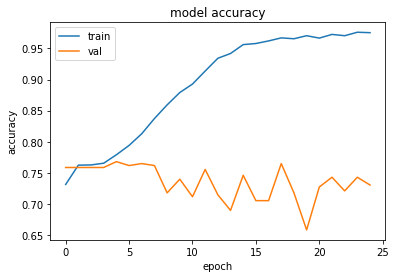

In [161]:
plot_fit_history(history)

In [162]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

798/798 [==============================] - 3s 4ms/step
Accuracy: 72.180450
